In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
credit_card = pd.read_csv("C:/Users/user/Desktop/Data_mining/dataset.csv",sep = ',')

In [97]:
credit_card.head()

ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
0  5008804       1        1             1           1      0      0   
1  5008806       1        1             1           0      0      0   
2  5008808       0        0             1           0      1      1   
3  5008812       0        0             1           0      0      0   
4  5008815       1        1             1           1      1      1   

   Unemployed  Num_children  Num_family  Account_length  Total_income  \
0           0             0           2              15      427500.0   
1           0             0           2              29      112500.0   
2           0             0           1               4      270000.0   
3           1             0           1              20      283500.0   
4           0             0           2               5      270000.0   

         Age  Years_employed           Income_type  \
0  32.868574       12.435574               Working   
1  58.793815        3.104787               Working   
2  52.321403        8.353354  Commercial associate   
3  61.504343        0.000000             Pensioner   
4  46.193967        2.105450               Working   

                  Education_type         Family_status       Housing_type  \
0               Higher education        Civil marriage   Rented apartment   
1  Secondary / secondary special               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3               Higher education             Separated  House / apartment   
4               Higher education               Married  House / apartment   

  Occupation_type  Target  
0           Other       1  
1  Security staff       0  
2     Sales staff       0  
3           Other       0  
4     Accountants       0

In [98]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [99]:
columns_to_change = ['Income_type','Education_type','Family_status','Housing_type','Occupation_type']

In [103]:
for i in columns_to_change:
    print(credit_card[i].value_counts(),'\n')

Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64 

Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64 

Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dtype: int64 

Housing_type
House / apartment      8684
With parents            448
Municipal apartment     323
Rented apartment        144
Office apartment         76
Co-op apartment          34
Name: count, dtype: int64 

Occupation_type
Other                    2994
Laborers                 1724
Sales staff               959
Core staff                877
Managers                  782
Drivers             

In [104]:
credit_card.columns.to_list()

['ID',
 'Gender',
 'Own_car',
 'Own_property',
 'Work_phone',
 'Phone',
 'Email',
 'Unemployed',
 'Num_children',
 'Num_family',
 'Account_length',
 'Total_income',
 'Age',
 'Years_employed',
 'Income_type',
 'Education_type',
 'Family_status',
 'Housing_type',
 'Occupation_type',
 'Target']

In [203]:
columns_to_drop = ['ID','Work_phone','Phone','Email','Income_type','Occupation_type']

In [204]:
credit_card = credit_card.drop(columns_to_drop, axis = 1)

In [205]:
credit_card['Education_type'] =credit_card['Education_type'].replace({'Higher education':'Postgraduate','Secondary / secondary special':
                                                                     'Secondary','Incomplete higher':'Undergraduate','Lower secondary':'Secondary',
                                                                     'Academic degree':'Postgraduate'})

In [109]:
credit_card['Education_type'].value_counts()

Education_type
Secondary        6875
Postgraduate     2463
Undergraduate     371
Name: count, dtype: int64

In [206]:
credit_card['Family_status'] = credit_card['Family_status'].replace({'Married':'Together','Single / not married':'Alone','Civil marriage':
                                                                    'Together','Separated':'Alone','Widow':'Alone'})

In [111]:
credit_card['Family_status'].value_counts()

Family_status
Together    7366
Alone       2343
Name: count, dtype: int64

In [207]:
credit_card['Housing_type'] = credit_card['Housing_type'].replace({'House / apartment':'Own','Municipal apartment':'Rented',
                            'Rented apartment':'Rented','Office apartment':'Rented','Co-op apartment':'Rented'})

In [113]:
credit_card['Housing_type'].value_counts()

Housing_type
Own             8684
Rented           577
With parents     448
Name: count, dtype: int64

In [208]:
credit_card = credit_card.rename(columns = {'Gender':'Is_Female','Unemployed':'Is_Unemployed','Family_status':'Is_in_Relationship'})

In [209]:
credit_card['Age'] = credit_card['Age'].astype(int)

In [121]:
credit_card['Num_children'].value_counts()

Num_children
0     6819
1     1886
2      852
3      126
4       18
5        5
14       1
19       1
7        1
Name: count, dtype: int64

In [210]:
credit_card = credit_card[~credit_card['Num_children'].isin([14,19])]

In [214]:
credit_card = credit_card.reset_index(drop = True)

HOUSING_TYPE: ONE-HOT-ENCODING - brak hierarchi pomiędzy kategoriami, więc lepiej użyć tej moetody

In [125]:
from sklearn.preprocessing import OneHotEncoder

In [126]:
onehot_encoder = OneHotEncoder(sparse=False)

In [216]:
housing_type_encoder = onehot_encoder.fit_transform(credit_card[['Housing_type']])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [217]:
housing_type_encoded_df = pd.DataFrame(housing_type_encoder, columns=onehot_encoder.get_feature_names_out(['Housing_type']))
credit_card= pd.concat([credit_card, housing_type_encoded_df], axis=1)

zakodowanie zmiennej Is_in_Relationship - Together->1, Alone->0

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
label_encoder = LabelEncoder()

In [218]:
credit_card['Is_in_Relationship_encoded'] = label_encoder.fit_transform(credit_card['Is_in_Relationship'])

Zakodowanie zmiennej Education_Type na: 0-Secondary, 1-Undergraduate, 2- Postgraduate

In [220]:
credit_card['Education_type_encoded'] = credit_card['Education_type'].replace({'Postgraduate':2,'Undergraduate':1,'Secondary':0})

In [221]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9707 entries, 0 to 9706
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Is_Female                   9707 non-null   int64  
 1   Own_car                     9707 non-null   int64  
 2   Own_property                9707 non-null   int64  
 3   Is_Unemployed               9707 non-null   int64  
 4   Num_children                9707 non-null   int64  
 5   Num_family                  9707 non-null   int64  
 6   Account_length              9707 non-null   int64  
 7   Total_income                9707 non-null   float64
 8   Age                         9707 non-null   int32  
 9   Years_employed              9707 non-null   float64
 10  Education_type              9707 non-null   object 
 11  Is_in_Relationship          9707 non-null   object 
 12  Housing_type                9707 non-null   object 
 13  Target                      9707 

In [140]:
credit_card.head()

Is_Female  Own_car  Own_property  Is_Unemployed  Num_children  Num_family  \
0        1.0      1.0           1.0            0.0           0.0         2.0   
1        1.0      1.0           1.0            0.0           0.0         2.0   
2        0.0      0.0           1.0            0.0           0.0         1.0   
3        0.0      0.0           1.0            1.0           0.0         1.0   
4        1.0      1.0           1.0            0.0           0.0         2.0   

   Account_length  Total_income   Age  Years_employed Education_type  \
0            15.0      427500.0  32.0       12.435574   Postgraduate   
1            29.0      112500.0  58.0        3.104787      Secondary   
2             4.0      270000.0  52.0        8.353354      Secondary   
3            20.0      283500.0  61.0        0.000000   Postgraduate   
4             5.0      270000.0  46.0        2.105450   Postgraduate   

  Is_in_Relationship Housing_type  Target  Housing_type_Own  \
0           Together       Rented     1.0               0.0   
1           Together          Own     0.0               1.0   
2              Alone          Own     0.0               1.0   
3              Alone          Own     0.0               1.0   
4           Together          Own     0.0               1.0   

   Housing_type_Rented  Housing_type_With parents  Is_in_Relationship_encoded  
0                  1.0                        0.0                           1  
1                  0.0                        0.0                           1  
2                  0.0                        0.0                           0  
3                  0.0                        0.0                           0  
4                  0.0                        0.0                           1

In [320]:
credit_card_model['Target'].value_counts()

Target
0    8424
1    1283
Name: count, dtype: int64

In [143]:
credit_card.columns.to_list()

['Is_Female',
 'Own_car',
 'Own_property',
 'Is_Unemployed',
 'Num_children',
 'Num_family',
 'Account_length',
 'Total_income',
 'Age',
 'Years_employed',
 'Education_type',
 'Is_in_Relationship',
 'Housing_type',
 'Target',
 'Housing_type_Own',
 'Housing_type_Rented',
 'Housing_type_With parents',
 'Is_in_Relationship_encoded',
 'Education_type_encoded']

WIZUALIZACJA

In [144]:
columns_to_visualization = ['Is_Female','Own_car','Own_property','Is_Unemployed','Num_children','Num_family',
                            'Account_length','Total_income','Age','Years_employed','Education_type',
                            'Is_in_Relationship','Housing_type','Target']

In [145]:
credit_card_visualization = credit_card[columns_to_visualization]

ZMIENNE BINARNE/kategoryczne - is_female, own_car, own_property, is_unemployed, education_type,'Is_in_Relationship','Housing_type'

Text(0, 0.5, 'Count')

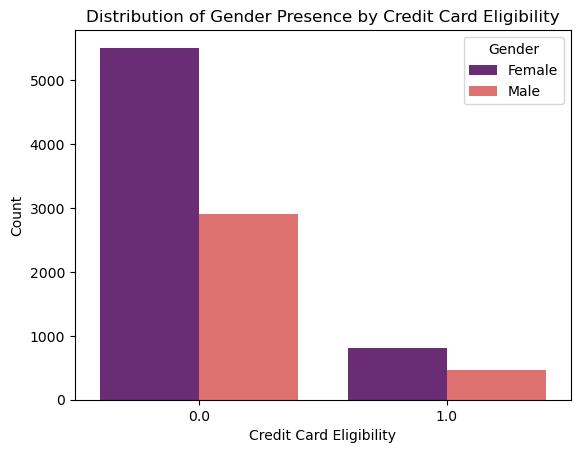

In [147]:
sns.countplot(data=credit_card_visualization, x='Target', hue='Is_Female', palette = 'magma')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.title('Distribution of Gender Presence by Credit Card Eligibility')
plt.xlabel('Credit Card Eligibility')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

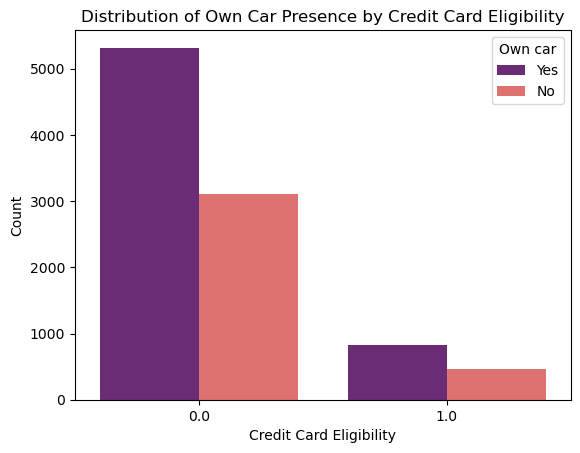

In [150]:
sns.countplot(data=credit_card_visualization, x='Target', hue='Own_car', palette = 'magma')
plt.legend(title='Own car', loc='upper right', labels=['Yes', 'No'])
plt.title('Distribution of Own Car Presence by Credit Card Eligibility')
plt.xlabel('Credit Card Eligibility')
plt.ylabel('Count')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(39.71917761381172, 0.5, 'Total Income')

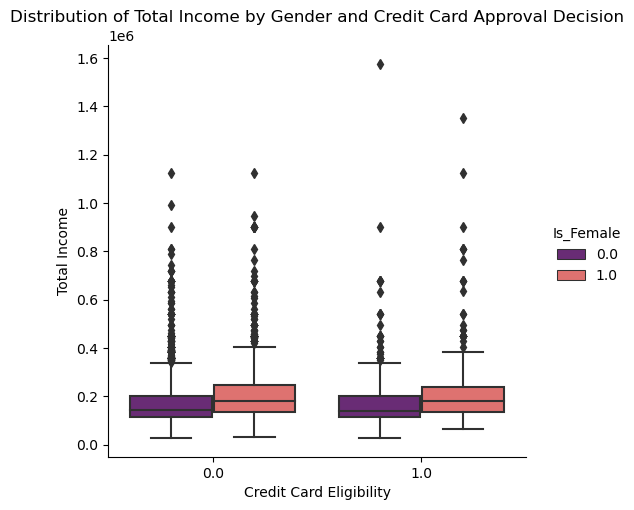

In [155]:
sns.catplot(data=credit_card_visualization, x="Target", y="Total_income", hue="Is_Female", kind="box", palette = 'magma')
plt.title('Distribution of Total Income by Gender and Credit Card Approval Decision')
plt.xlabel('Credit Card Eligibility')
plt.ylabel('Total Income')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


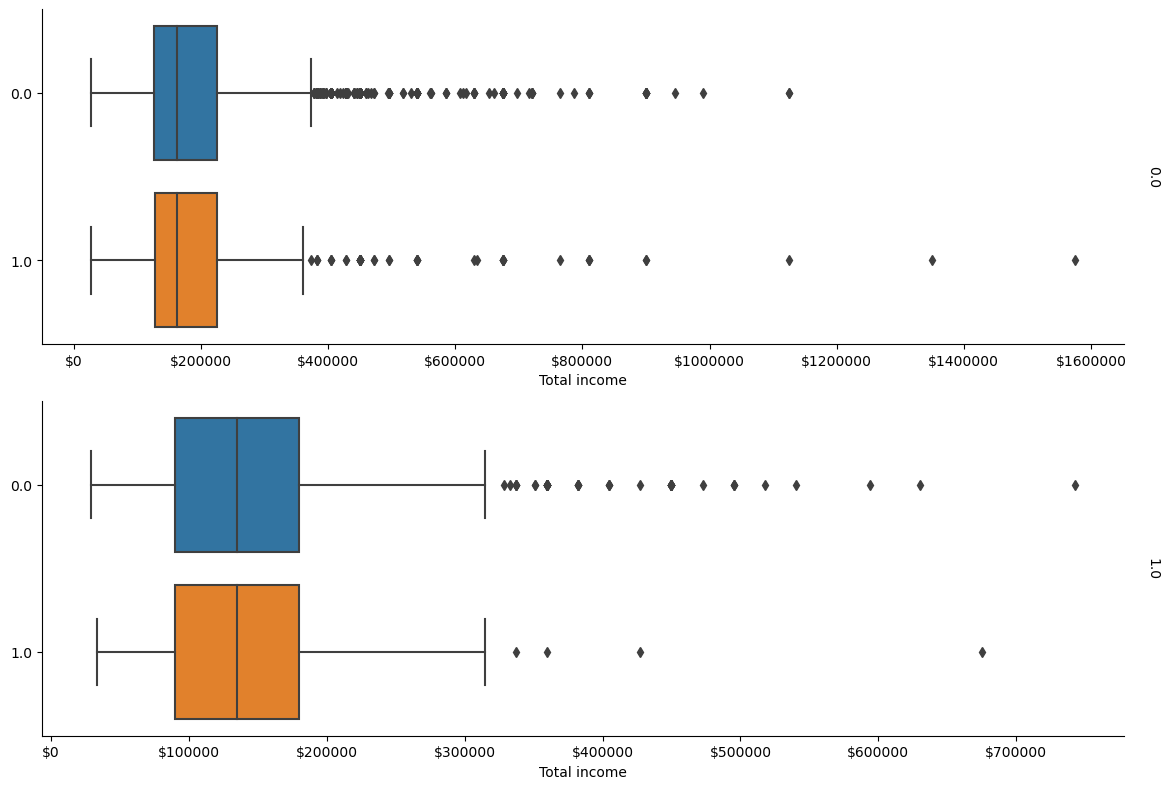

In [161]:
g = sns.catplot(
    data=credit_card_visualization,
    x="Total_income", y="Target", row="Is_Unemployed",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=4, aspect=3,
)
g.set(xlabel="Total income", ylabel="")
g.set_titles(row_template="{row_name}")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


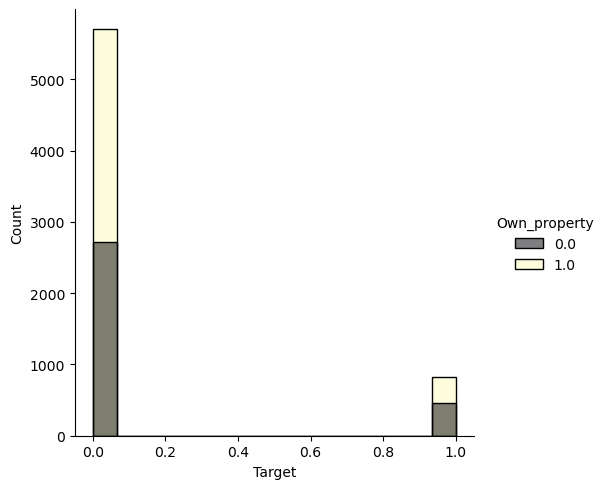

In [151]:
sns.displot(credit_card_visualization, x='Target',hue='Own_property', palette = 'magma')

Text(0, 0.5, 'Total_Income')

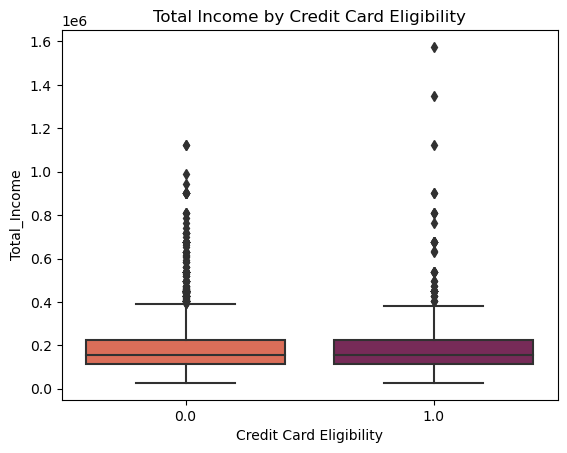

In [163]:
sns.boxplot(x='Target', y = 'Total_income', data=credit_card_visualization, palette = "rocket_r")
plt.title("Total Income by Credit Card Eligibility")
plt.xlabel("Credit Card Eligibility")
plt.ylabel('Total_Income')

Text(0, 0.5, 'Account Length')

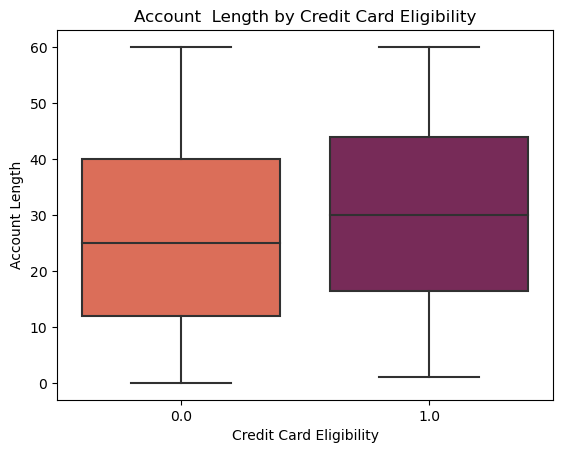

In [165]:
sns.boxplot(x='Target', y = 'Account_length', data=credit_card_visualization, palette = "rocket_r")
plt.title("Account  Length by Credit Card Eligibility")
plt.xlabel("Credit Card Eligibility")
plt.ylabel('Account Length')

Text(0, 0.5, 'Age')

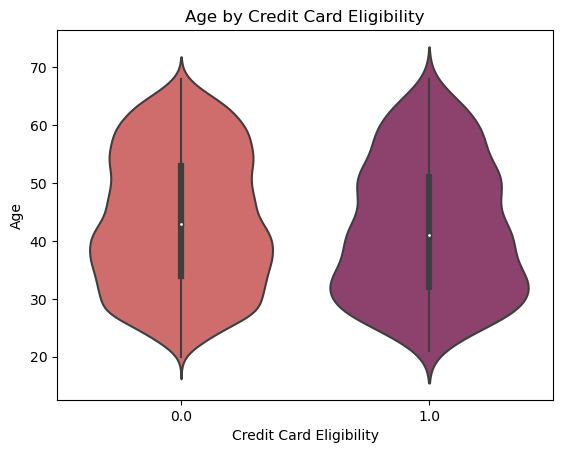

In [167]:
sns.violinplot(x='Target', y = 'Age', data=credit_card_visualization, palette = 'flare', c_map = True)
plt.title("Age by Credit Card Eligibility")
plt.xlabel("Credit Card Eligibility")
plt.ylabel('Age')

Text(0, 0.5, 'Years Employed')

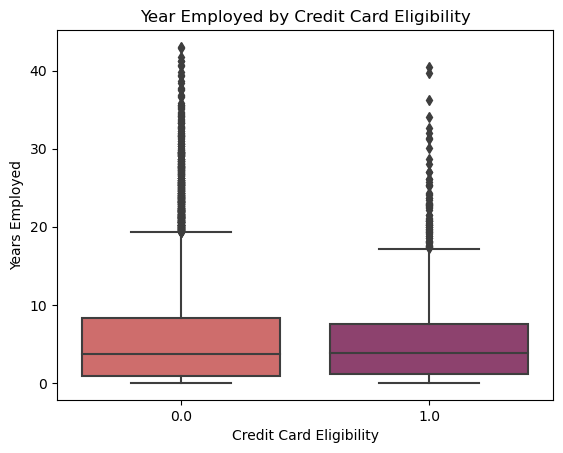

In [170]:
sns.boxplot(x='Target', y = 'Years_employed', data=credit_card_visualization, palette = 'flare')
plt.title("Year Employed by Credit Card Eligibility")
plt.xlabel("Credit Card Eligibility")
plt.ylabel('Years Employed')

MODEL RANDOM FOREST

In [171]:
credit_card.columns.to_list()

['Is_Female',
 'Own_car',
 'Own_property',
 'Is_Unemployed',
 'Num_children',
 'Num_family',
 'Account_length',
 'Total_income',
 'Age',
 'Years_employed',
 'Education_type',
 'Is_in_Relationship',
 'Housing_type',
 'Target',
 'Housing_type_Own',
 'Housing_type_Rented',
 'Housing_type_With parents',
 'Is_in_Relationship_encoded',
 'Education_type_encoded']

In [172]:
columns_to_delete = ['Education_type','Is_in_Relationship','Housing_type']

In [222]:
credit_card_model = credit_card.drop(columns = columns_to_delete)

In [223]:
credit_card_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9707 entries, 0 to 9706
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Is_Female                   9707 non-null   int64  
 1   Own_car                     9707 non-null   int64  
 2   Own_property                9707 non-null   int64  
 3   Is_Unemployed               9707 non-null   int64  
 4   Num_children                9707 non-null   int64  
 5   Num_family                  9707 non-null   int64  
 6   Account_length              9707 non-null   int64  
 7   Total_income                9707 non-null   float64
 8   Age                         9707 non-null   int32  
 9   Years_employed              9707 non-null   float64
 10  Target                      9707 non-null   int64  
 11  Housing_type_Own            9707 non-null   float64
 12  Housing_type_Rented         9707 non-null   float64
 13  Housing_type_With parents   9707 

In [224]:
credit_card[credit_card.isnull().any(axis=1)] 

Empty DataFrame
Columns: [Is_Female, Own_car, Own_property, Is_Unemployed, Num_children, Num_family, Account_length, Total_income, Age, Years_employed, Education_type, Is_in_Relationship, Housing_type, Target, Housing_type_Own, Housing_type_Rented, Housing_type_With parents, Is_in_Relationship_encoded, Education_type_encoded]
Index: []

In [225]:
X = credit_card_model.drop('Target', axis = 1)

In [226]:
y = credit_card_model['Target']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [125]:
from sklearn.metrics import accuracy_score, classification_report

In [129]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\__init__.py)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((6794, 15), (2913, 15))

In [18]:
import numpy as np

In [228]:
X_train.isnull().sum()

Is_Female                     0
Own_car                       0
Own_property                  0
Is_Unemployed                 0
Num_children                  0
Num_family                    0
Account_length                0
Total_income                  0
Age                           0
Years_employed                0
Housing_type_Own              0
Housing_type_Rented           0
Housing_type_With parents     0
Is_in_Relationship_encoded    0
Education_type_encoded        0
dtype: int64

In [307]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=8, min_samples_leaf = 5,
                                       n_estimators=200, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42)

In [308]:
y_pred = classifier_rf.predict(X_test)

In [309]:
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji:", accuracy)

Dokładność klasyfikacji: 0.8585650532097494


In [310]:
print("Raport klasyfikacji:")
print(classification_report(y_test, y_pred, target_names=['no approval', 'approval']))

Raport klasyfikacji:
              precision    recall  f1-score   support

 no approval       0.86      1.00      0.92      2501
    approval       0.00      0.00      0.00       412

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [294]:
feature_names = list(X.columns)

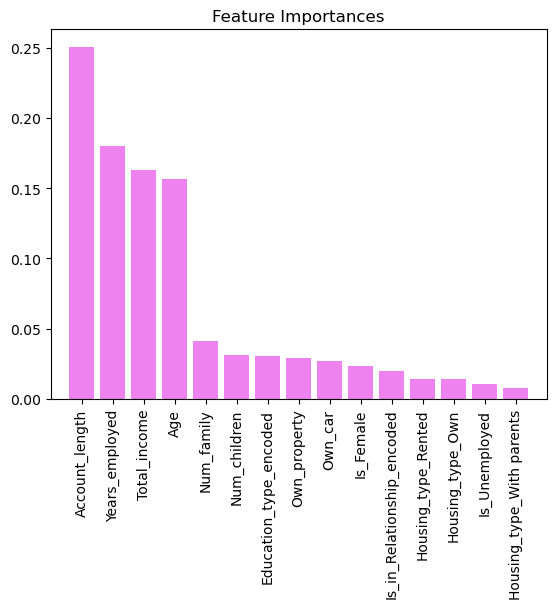

In [311]:
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="violet", align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [288]:
classifier_rf.feature_importances_

array([0.02498436, 0.02434228, 0.02690396, 0.00958315, 0.02901148,
       0.04555928, 0.27133311, 0.15836081, 0.15443284, 0.170297  ,
       0.01426748, 0.0141862 , 0.00714839, 0.0192382 , 0.03035145])

In [276]:
classifier_rf.estimators_

[DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                        random_state=787846414),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                        random_state=996406378),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                        random_state=423734972),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=10,
                     

In [312]:
classifier_rf.oob_score_

0.8717986458639977

In [318]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [3,5,8,10,20],
    'min_samples_leaf': [5,10,20,50,100,150,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 210 candidates, totalling 840 fits


exception calling callback for <Future at 0x1edcf1db1d0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute '_PredictScorer' on <module 'sklearn.metrics._scorer' from 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\sklearn\\metrics\\_scorer.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\_base.py", line 26, in _invoke_callbacks
    call

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [262]:
grid_search.best_score_

0.8717986780833455

In [263]:
grid_search

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 150, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [264]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [247]:
X.columns= X.columns.tolist()

In [249]:
feature_name = X.columns.tolist()

In [239]:
rf_best.estimators_

[DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=5,
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=5,
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=5,
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=5,
                        random_state=787846414),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=5,
                        random_state=996406378),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=5,
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=5,
                        random_state=423734972),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=5,
                        rando

In [317]:
from sklearn.ensemble import plot_forest

ImportError: cannot import name 'plot_forest' from 'sklearn.ensemble' (C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\__init__.py)

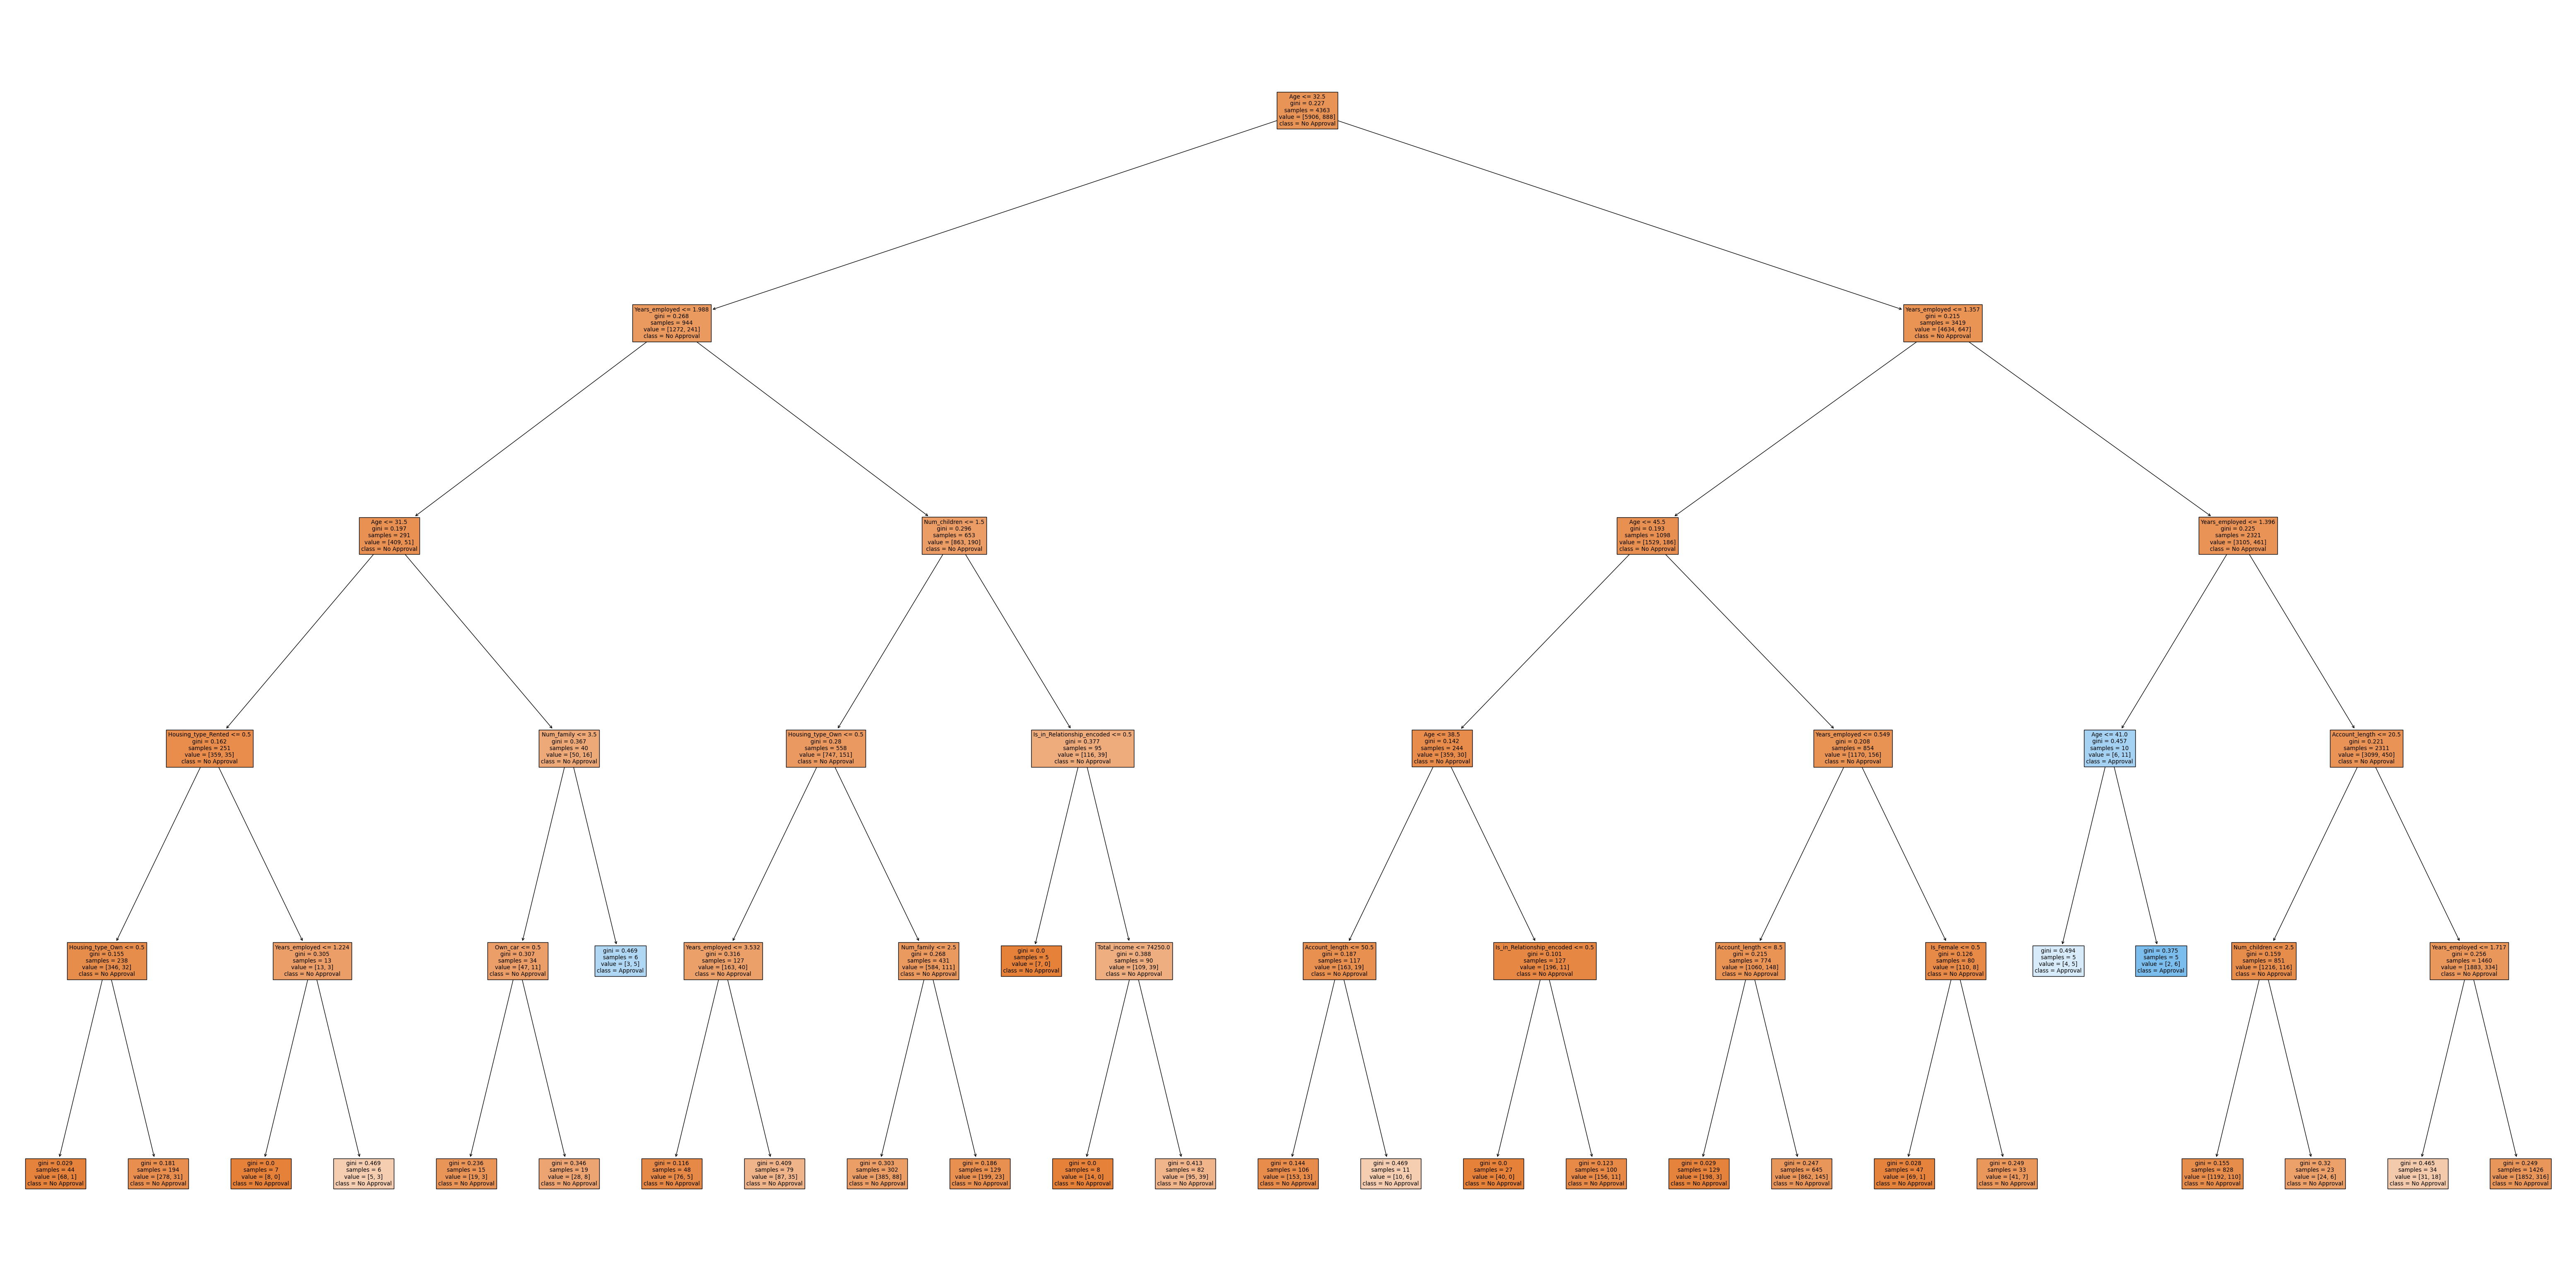

In [302]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(classifier_rf.estimators_[5], feature_names = feature_name,class_names=['No Approval', "Approval"],filled=True);

In [257]:
credit_card_model.to_csv('C:/Users/user/Desktop/Data_mining/credit_card_data.csv')

In [2]:
from imblearn.over_sampling import RandomOverSampler

In [1]:
from imblearn.over_sampling import SMOTE

In [3]:
from collections import Counter

In [7]:
credit_card_model = pd.read_csv('C:/Users/user/Desktop/Data_mining/credit_card_data.csv', sep = ',')

In [39]:
credit_card_model = credit_card_model.drop('Unnamed: 0',axis=1)

In [40]:
y = credit_card_model['Target']

In [43]:
X = credit_card_model.drop('Target', axis = 1)

In [44]:
print("Przed oversamplingiem:", Counter(y))

Przed oversamplingiem: Counter({0: 8424, 1: 1283})


In [45]:
oversampler = RandomOverSampler(random_state=42)

In [46]:
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [47]:
print("Po oversamplingu:", Counter(y_resampled))

Po oversamplingu: Counter({1: 8424, 0: 8424})


In [48]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, train_size=0.7, random_state=42)
X_train_resampled.shape, X_test_resampled.shape

((11793, 15), (5055, 15))

In [119]:
classifier_rf_resampled = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=10, min_samples_leaf = 5,
                                       n_estimators=300, max_features = 'sqrt', oob_score=True)
classifier_rf_resampled.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=300,
                       n_jobs=-1, oob_score=True, random_state=42)

In [180]:
y_pred_resampled = rf_best1.predict(X_test_resampled)

In [181]:
accuracy1 = accuracy_score(y_test_resampled, y_pred_resampled)
print("Dokładność klasyfikacji:", accuracy1)

Dokładność klasyfikacji: 0.88486646884273


In [150]:
from sklearn.metrics import confusion_matrix

In [182]:
cm = confusion_matrix(y_test_resampled, y_pred_resampled)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2168  359]
 [ 223 2305]]


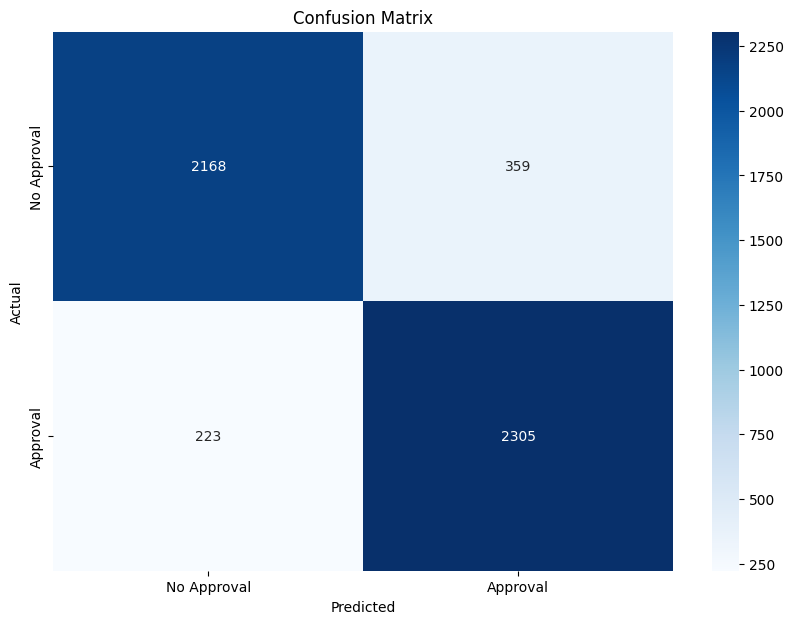

In [183]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [186]:
from sklearn.metrics import roc_curve, auc

In [188]:
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_resampled)
roc_auc = auc(fpr, tpr)

In [190]:
fpr, tpr

(array([0.        , 0.14206569, 1.        ]),
 array([0.        , 0.91178797, 1.        ]))

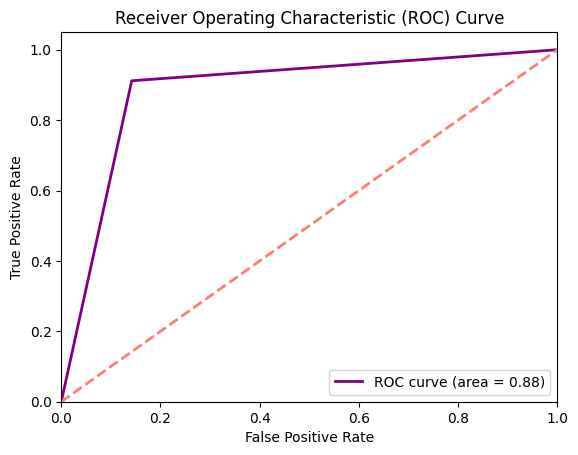

In [191]:
plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='salmon', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [184]:
TN, FP, FN, TP = cm.ravel()

# Obliczanie precyzji (precision)
precision = TP / (TP + FP)

# Obliczanie recall
recall = TP / (TP + FN)

# Obliczanie F1-score
f1 = 2 * (precision * recall) / (precision + recall)

# Obliczanie dokładności (accuracy)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Precyzja (Precision):", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Dokładność (Accuracy):", accuracy)

Precyzja (Precision): 0.8652402402402403
Recall: 0.9117879746835443
F1-score: 0.887904468412943
Dokładność (Accuracy): 0.88486646884273


In [185]:
print("Raport klasyfikacji:")
print(classification_report(y_test_resampled, y_pred_resampled, target_names=['no approval', 'approval']))

Raport klasyfikacji:
              precision    recall  f1-score   support

 no approval       0.91      0.86      0.88      2527
    approval       0.87      0.91      0.89      2528

    accuracy                           0.88      5055
   macro avg       0.89      0.88      0.88      5055
weighted avg       0.89      0.88      0.88      5055



In [154]:
y_train_resampled

6459     0
8452     1
1285     0
10870    1
4303     0
        ..
11284    1
11964    1
5390     0
860      0
15795    1
Name: Target, Length: 11793, dtype: int64

In [153]:
target_names_1 = list(y_train_resampled.columns)

AttributeError: 'Series' object has no attribute 'columns'

In [113]:
feature_names = list(X_train_resampled.columns)

In [133]:
import shap

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [139]:
explainer

In [135]:
explainer = shap.TreeExplainer(classifier_rf_resampled)
shap_values = explainer.shap_values(X_test_resampled)

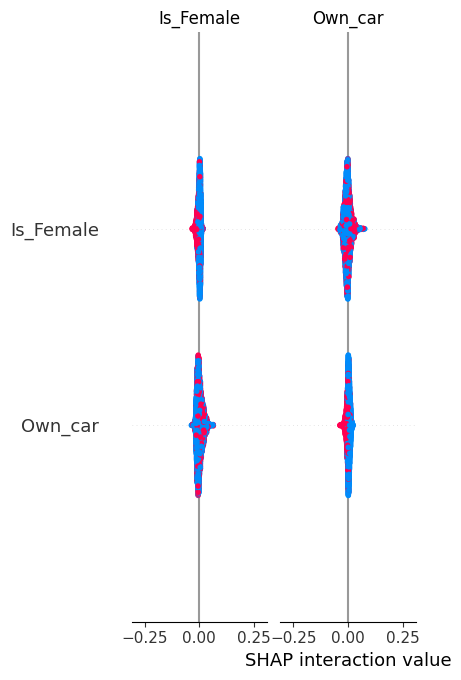

In [136]:
shap.summary_plot(shap_values, X_test_resampled)

In [147]:
len(X_test_resampled)

5055

In [148]:
len(shap_values)

5055

In [146]:
X_test_resampled.columns

Index(['Is_Female', 'Own_car', 'Own_property', 'Is_Unemployed', 'Num_children',
       'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed',
       'Housing_type_Own', 'Housing_type_Rented', 'Housing_type_With parents',
       'Is_in_Relationship_encoded', 'Education_type_encoded'],
      dtype='object')

In [143]:
target_names = ['No Approval', 'Approval']

In [141]:
example_indices = [0, 1, 2]

In [171]:
print(f"\nPrzykład {95}:")
print("Dane wejściowe:")
print(X_test_resampled.iloc[95])
print("Wynik modelu:", target_names[classifier_rf_resampled.predict([X_test_resampled.iloc[95]])[0]])


Przykład 95:
Dane wejściowe:
Is_Female                          1.000000
Own_car                            1.000000
Own_property                       0.000000
Is_Unemployed                      0.000000
Num_children                       0.000000
Num_family                         2.000000
Account_length                     7.000000
Total_income                  225000.000000
Age                               40.000000
Years_employed                     8.900936
Housing_type_Own                   1.000000
Housing_type_Rented                0.000000
Housing_type_With parents          0.000000
Is_in_Relationship_encoded         1.000000
Education_type_encoded             2.000000
Name: 4907, dtype: float64
Wynik modelu: No Approval


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
for i in range(250):  
    print(f"\nPrzykład {i}:")
    print("Dane wejściowe:")
    print(X_test_resampled.iloc[i])
    print("Wynik modelu:", target_names[classifier_rf_resampled.predict([X_test_resampled.iloc[i]])[0]])


In [162]:

print(f"\nPrzykład {1}:")
print("Dane wejściowe:")
print(X_test_resampled.iloc[2])
print("Wynik modelu:", target_names[classifier_rf_resampled.predict([X_test_resampled.iloc[1]])[0]])
shap.initjs()
shap.force_plot(explainer.expected_value[classifier_rf_resampled.predict([X_test_resampled.iloc[1]])[0]], 
                    shap_values[classifier_rf_resampled.predict([X_test_resampled.iloc[1]])[0]][1], 
                    X_test_resampled.iloc[1])


Przykład 1:
Dane wejściowe:
Is_Female                          0.000000
Own_car                            0.000000
Own_property                       0.000000
Is_Unemployed                      0.000000
Num_children                       0.000000
Num_family                         2.000000
Account_length                    48.000000
Total_income                  191250.000000
Age                               55.000000
Years_employed                    22.371438
Housing_type_Own                   1.000000
Housing_type_Rented                0.000000
Housing_type_With parents          0.000000
Is_in_Relationship_encoded         1.000000
Education_type_encoded             0.000000
Name: 3274, dtype: float64
Wynik modelu: Approval


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


DimensionError: Length of features is not equal to the length of shap_values!

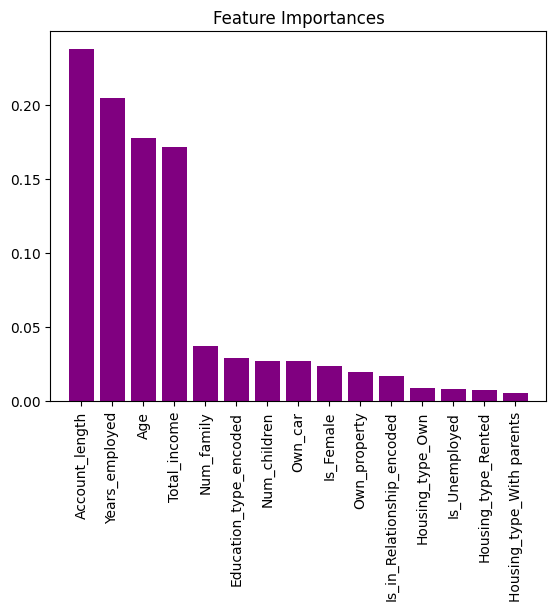

In [177]:
importances1 = rf_best1.feature_importances_
indices1 = np.argsort(importances1)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train_resampled.shape[1]), importances1[indices1], color="purple", align="center")
plt.xticks(range(X_train_resampled.shape[1]), [feature_names[i] for i in indices1], rotation=90)
plt.xlim([-1, X_train_resampled.shape[1]])
plt.show()

In [178]:
rf_best1.oob_score_

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

In [173]:
rf1 = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [3,5,8,10,20],
    'min_samples_leaf': [5,10,20,50,100,150,200],
    'n_estimators': [10,25,30,50,100,200, 300]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf1,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 4 folds for each of 245 candidates, totalling 980 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 150, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200, 300]},
             scoring='accuracy', verbose=1)

In [174]:
grid_search.best_score_

0.8452473425437319

In [175]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [176]:
rf_best1 = grid_search.best_estimator_
rf_best1

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [59]:
feature_name = list(X_train_resampled.columns)

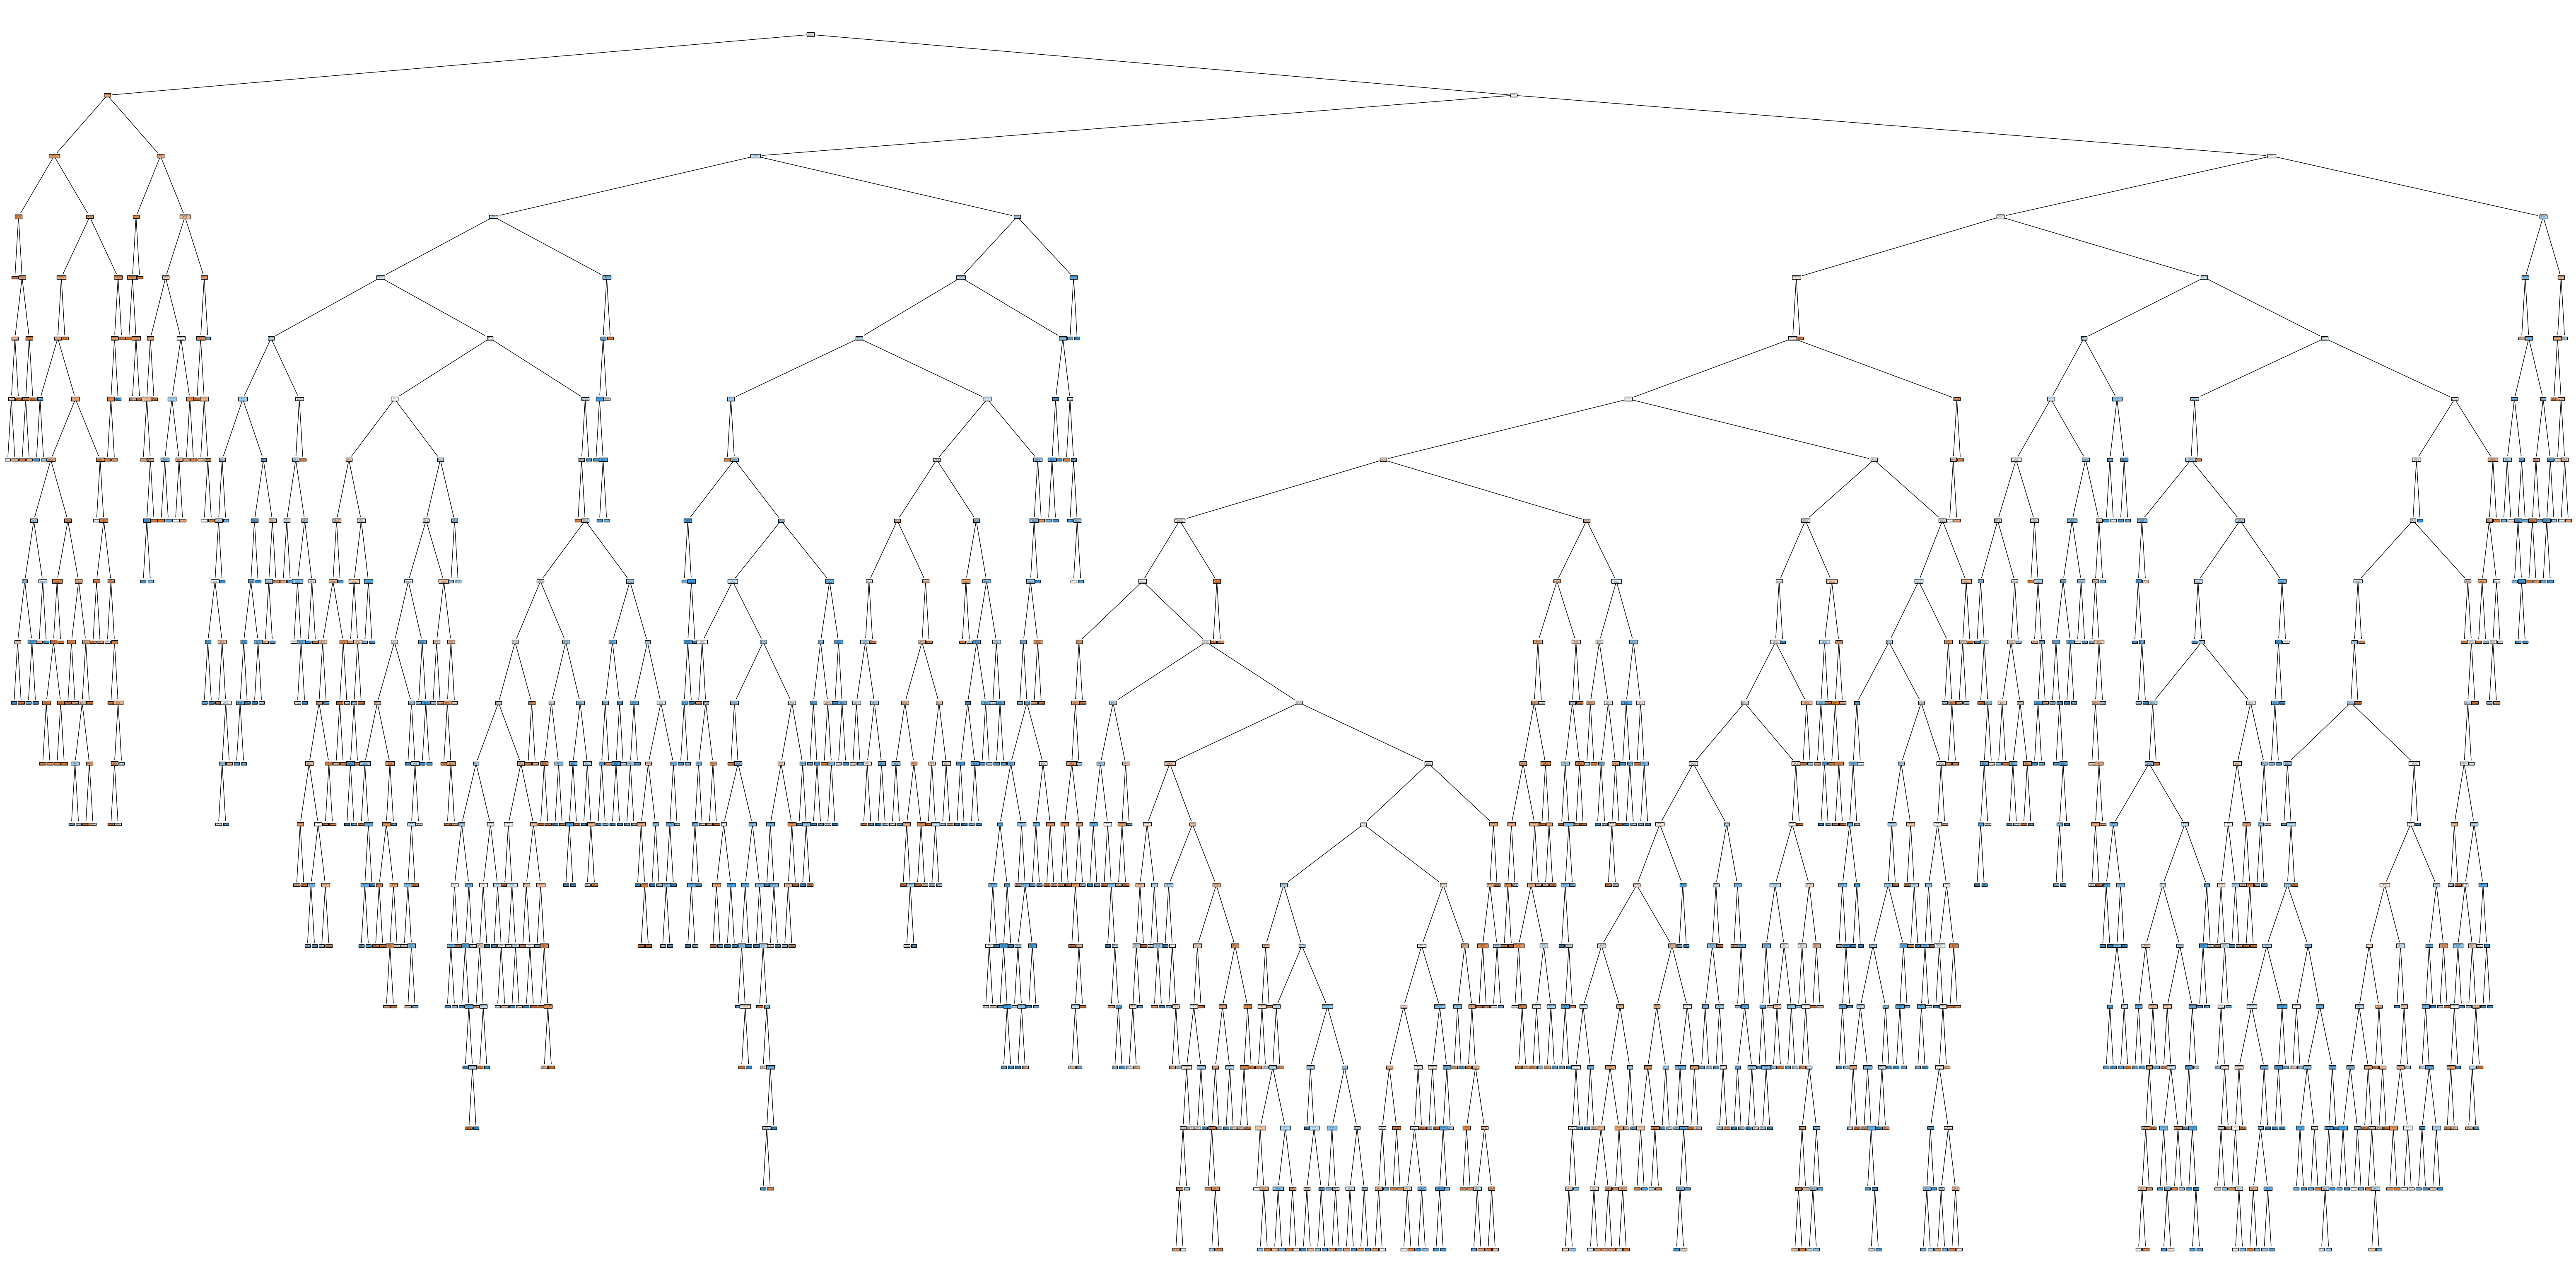

In [179]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best1.estimators_[0], feature_names = feature_name,class_names=['No Approval', "Approval"],filled=True);